In [1]:
from dataclasses import dataclass

@dataclass
class ConstantProductState:
    a_supply: int
    b_supply: int

    issued: int
    supply: int

    scale: int
    fee: int

    def mint(self, a, b) -> int:
        return int(
            int(
                int(min(a / self.a_supply, b / self.b_supply) * self.scale)
                * self.issued
            )
            / self.scale
        )

    def burn_a(self, amount) -> int:
        return int((self.a_supply * amount) / self.issued)

    def burn_b(self, amount) -> int:
        return int((self.b_supply * amount) / self.issued)

    def swap_a(self, amount) -> int:
        factor = self.scale - self.fee
        return int(
            (amount * factor * self.b_supply)
            / ((self.a_supply * self.scale) + (amount * factor))
        )

    def swap_b(self, amount):
        factor = self.scale - self.fee
        return int(
            (amount * factor * self.a_supply)
            / ((self.b_supply * self.scale) + (amount * factor))
        )

    def ratio(self):
        return min(self.a_supply, self.b_supply) / max(self.a_supply, self.b_supply)


In [2]:
cps = ConstantProductState(10000, 50000, 1000, 10000000, 1000, 3)

In [3]:
cps

ConstantProductState(a_supply=10000, b_supply=50000, issued=1000, supply=10000000, scale=1000, fee=3)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

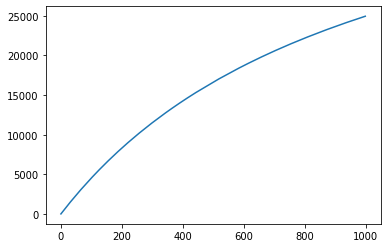

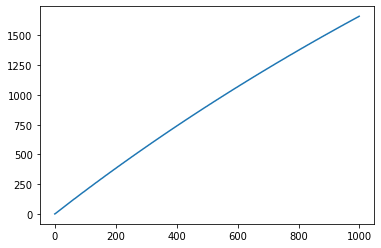

In [17]:
swap_b = [cps.swap_b(x) for x in range(0,10000,10)]
swap_a = [cps.swap_a(x) for x in range(0,10000,10)]
plt.plot(swap_a)
plt.show()
plt.plot(swap_b)
plt.show()

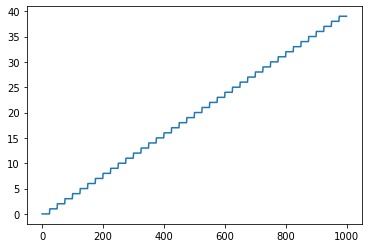

In [14]:
mints  = [cps.mint(x, x*cps.ratio()) for x in range(0,10000,10)]
plt.plot(mints)
plt.show()

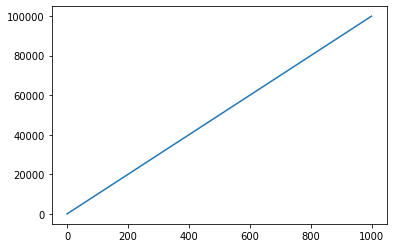

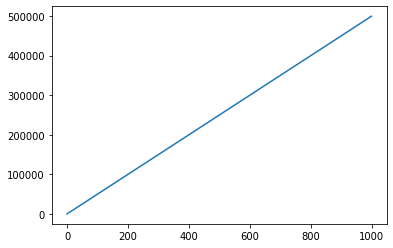

In [18]:
burn_a  = [cps.burn_a(x) for x in range(0,10000,10)]
burn_b  = [cps.burn_b(x) for x in range(0,10000,10)]
plt.plot(burn_a)
plt.show()
plt.plot(burn_b)
plt.show()